In [45]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re

import warnings
warnings.filterwarnings('ignore')

from konlpy.tag import Mecab

import gensim
import gensim.corpora as corpora

from gensim.models import CoherenceModel
from gensim.models.ldamodel import LdaModel

import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
mecab = Mecab()

In [61]:
def make_tokens(data) :
    data['review'] = [re.sub(r'[^가-힣]+', ' ', s) for s in data['review']]
    all_tokens = []
    for r in data['review'] :
        tokens = mecab.pos(r)
        pos_token = []
        for token in tokens :
            if token[1].startswith('NN') or token[1].startswith('VV') or token[1].startswith('M') :
                pos_token.append(token[0])
            else :
                pass
        all_tokens.append(pos_token)
        
    data['token'] = all_tokens
    
    return data

## Load Data

In [68]:
mask = pd.read_excel('mask1000.xlsx').dropna()

In [69]:
suncream = pd.read_excel('suncream1000.xlsx').dropna()

In [70]:
skincare = pd.read_excel('skincare1000.xlsx').dropna()

In [71]:
cleaning = pd.read_excel('cleaning1000.xlsx').dropna()

## Make Data

In [72]:
mask = make_tokens(mask)

In [73]:
suncream = make_tokens(suncream)

In [74]:
skincare = make_tokens(skincare)

In [75]:
cleaning = make_tokens(cleaning)

## Get coherence score

In [84]:
def get_coherence_score_result(data) :
    id2word = corpora.Dictionary(data['token'])
    corpus = [id2word.doc2bow(text)  for text in data['token']]
    n_ch_score = []
    for num in range(1, 40) :
        model = LdaModel(num_topics = num, corpus = corpus, id2word = id2word, iterations = 500)
        cm = CoherenceModel(model, texts = data['token'], coherence = 'c_v')
        ch_score = cm.get_coherence()
        n_ch_score.append(ch_score)
        
    plt.figure(figsize = (10, 8))
    plt.plot(n_ch_score)
    plt.xlabel('Number of Topics')
    plt.ylabel('Coherence Score')
    plt.show()

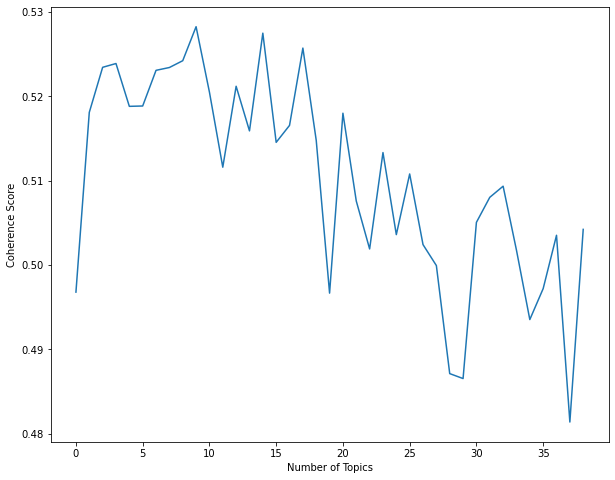

In [85]:
get_coherence_score_result(mask)

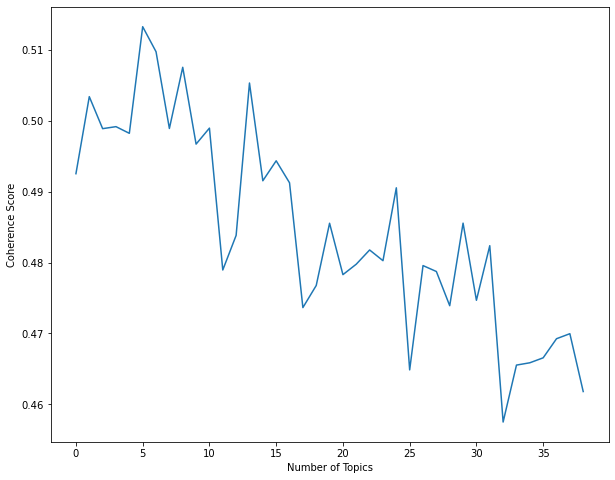

In [86]:
get_coherence_score_result(suncream)

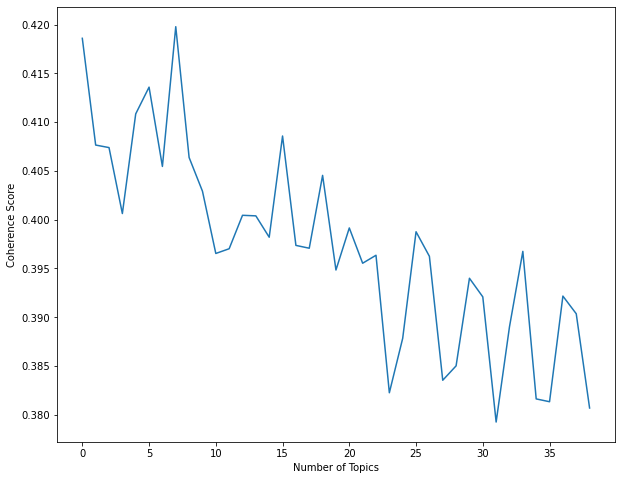

In [87]:
get_coherence_score_result(skincare)

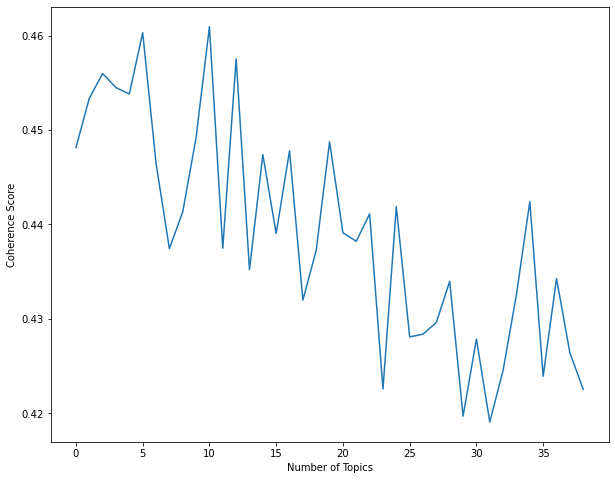

In [88]:
get_coherence_score_result(cleaning)

In [89]:
pyLDAvis.enable_notebook()

In [91]:
vis = pyLDAvis.gensim.prepare(model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
17     0.053099  0.002670       1        1  17.107144
9      0.075517  0.014060       2        1   9.487899
2      0.064622 -0.000040       3        1   8.250779
25     0.077574 -0.005695       4        1   8.180920
10     0.062940 -0.003646       5        1   7.134558
19     0.073443 -0.022670       6        1   5.299420
28     0.060117 -0.010169       7        1   4.475653
5      0.051169  0.022814       8        1   3.867207
27     0.058713  0.011205       9        1   3.514339
1      0.065583  0.018602      10        1   3.451826
24     0.055722  0.007022      11        1   3.304327
26     0.024471  0.019950      12        1   2.935932
21     0.040075 -0.051946      13        1   2.884347
8      0.030453 -0.013816      14        1   2.648943
13     0.052069 -0.014276      15        1   2.579067
15     0.032977 -0.014756      16        1   1.962807
7      0.017384  0.084680      17        1   1.763498
11     0.021999 -0.009618      18        1   1.652385
3      0.002385 -0.031202      19        1   1.459495
23    -0.013746  0.050825      20        1   1.433439
6     -0.017171  0.009030      21        1   1.322604
22    -0.021369 -0.047974      22        1   1.153628
4     -0.041699  0.015240      23        1   1.069554
12    -0.048380 -0.059948      24        1   1.046637
18    -0.113821  0.138439      25        1   0.532148
16    -0.118394 -0.005378      26        1   0.514200
20    -0.125826 -0.052864      27        1   0.458910
14    -0.158878 -0.066486      28        1   0.337759
0     -0.261029  0.015946      29        1   0.170574, topic_info=    Term         Freq        Total Category  logprob  loglift
91     팩  1680.000000  1680.000000  Default  30.0000  30.0000
94    피부   817.000000   817.000000  Default  29.0000  29.0000
214    쓰   478.000000   478.000000  Default  28.0000  28.0000
45    사용   689.000000   689.000000  Default  27.0000  27.0000
76    제품   413.000000   413.000000  Default  26.0000  26.0000
..   ...          ...          ...      ...      ...      ...
147  트러블     0.467969   274.825892  Topic29  -4.8950  -0.0017
95     하     0.468058   550.077305  Topic29  -4.8948  -0.6955
30     때     0.468152   570.209222  Topic29  -4.8946  -0.7312
83    진정     0.468068   625.308259  Topic29  -4.8948  -0.8236
150   가격     0.260281   126.135053  Topic29  -5.4816   0.1904

[2051 rows x 6 columns], token_table=      Topic      Freq Term
term                      
150       1  0.182344   가격
150       2  0.087208   가격
150       3  0.071352   가격
150       4  0.095136   가격
150       5  0.110992   가격
...     ...       ...  ...
561       2  0.154529   힐티
561       4  0.154529   힐티
561       5  0.309058   힐티
561      15  0.154529   힐티
561      21  0.154529   힐티

[5770 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[18, 10, 3, 26, 11, 20, 29, 6, 28, 2, 25, 27, 22, 9, 14, 16, 8, 12, 4, 24, 7, 23, 5, 13, 19, 17, 21, 15, 1])